# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
unique_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in unique_cities:
        unique_cities.append(city)

# Print the city count to confirm sufficient count
len(unique_cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# If reposponse OKAY, then save json to cityweather list.
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(unique_cities):
    r = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={c}&appid={api_key}')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(unique_cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
Processing Record   0 of 633 | Puerto Ayora
City not found. Skipping...
Processing Record   2 of 633 | Muroto
Processing Record   3 of 633 | Atuona
Processing Record   4 of 633 | Ngunguru
Processing Record   5 of 633 | Mansa
Processing Record   6 of 633 | Axim
Processing Record   7 of 633 | Lata
Processing Record   8 of 633 | Marawi
Processing Record   9 of 633 | Ilhabela
Processing Record  10 of 633 | Vila Franca Do Campo
Processing Record  11 of 633 | Taltal
Processing Record  12 of 633 | Kapaa
Processing Record  13 of 633 | Lompoc
Processing Record  14 of 633 | Bredasdorp
Processing Record  15 of 633 | Barrow
Processing Record  16 of 633 | San Policarpo
Processing Record  17 of 633 | Saskylakh
Processing Record  18 of 633 | Brokopondo
Processing Record  19 of 633 | Mataura
Processing Record  20 of 633 | Pasni
Processing Record  21 of 633 | Hofn
Processing Record  22 of 633 | Upernavik
Processing Record  23 of 633 | Cove
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data = pd.DataFrame(cityweather)
data.head(1)

,coord,weather,base,main,wind,clouds,dt,sys,timezone,id,name,cod,visibility,rain,snow
0,"{'lon': -90.35, 'lat': -0.74}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 295.37, 'feels_like': 297.88, 'temp_m...","{'speed': 1.79, 'deg': 210, 'gust': 3.13}",{'all': 12},1576305476,"{'type': 3, 'id': 2005652, 'country': 'EC', 's...",-21600,3652764,Puerto Ayora,200,NaN,NaN,NaN


In [5]:
# Select only City, Cloudiness, Country, Date, Humidity,
# Latitude, Longitude, Max Temperature, and Wind Speed data.
cities = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
cities.to_csv('data/cities.csv')
cities.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [6]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,12,EC,1576305476,88,-0.74,-90.35,295.37,1.79
1,Muroto,20,JP,1576305874,36,33.37,134.14,291.15,6.20
2,Atuona,0,PF,1576305478,58,-9.80,-139.03,299.74,2.41
3,Ngunguru,100,NZ,1576305874,63,-35.62,174.50,293.71,3.13
4,Mansa,0,IN,1576305874,60,23.43,72.66,295.15,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

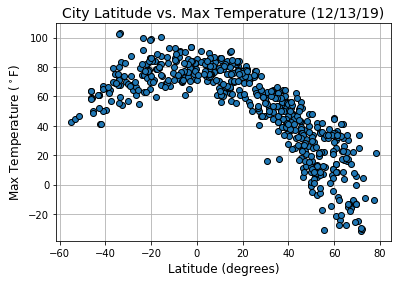

In [7]:
plt.plot(cities['Lat'], (cities['Max Temp'] - 273.15) * (9/5) + 32, 'o', markeredgecolor='k')
plt.title('City Latitude vs. Max Temperature (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()
plt.savefig('images/lat-vs-temp.png')

#### Latitude vs. Humidity Plot

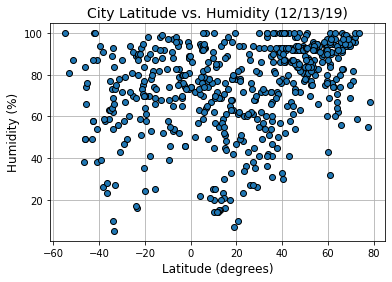

In [8]:
plt.plot(cities['Lat'], cities['Humidity'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Humidity (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-hum.png')

#### Latitude vs. Cloudiness Plot

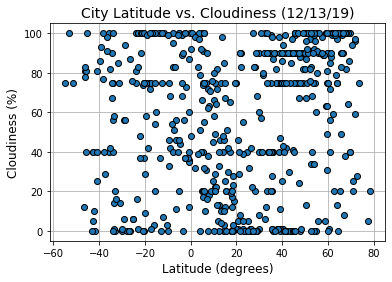

In [9]:
plt.plot( cities['Lat'], cities['Cloudiness'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Cloudiness (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()
plt.savefig('images/lat-vs-cloud.png')

#### Latitude vs. Wind Speed Plot

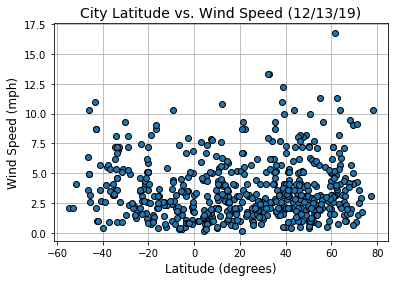

In [10]:
plt.plot(cities['Lat'], cities['Wind Speed'], 'o', markeredgecolor='k')
plt.title('City Latitude vs. Wind Speed (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.grid()
plt.savefig('images/lat-vs-speed.png')